## İmport Dataset

In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("../Database/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Veri Ön İşleme

In [2]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
target_col = df[["Level"]]
df.drop(['Level', 'Patient Id', 'index'], axis=1, inplace=True)

Herhangi bir kayıp gözlem yok, ek olarak hedef değişken ve iki anlamsız feature'ı verisetinden atıyoruz. Aykırı/uç değer var mı inceleyelim.

In [5]:
def get_outliers(df):
    '''Bu Python işlevi, IQR yöntemini kullanarak bir DataFrame'in her sayısal sütunundaki aykırı
    değerlerin sayısını ve yüzdesini hesaplar ve döndürür.
    
    Parameters
    ----------
    df
        Sağladığınız kod, bir DataFrame'in her sayısal sütunundaki aykırı değerlerin sayısını ve yüzdesini
    hesaplayan ve döndüren "get_outliers" adlı bir işlevi tanımlar. Ancak kodda pandalar ve numpy
    kitaplıkları için içe aktarma ifadeleri eksik. Gerekli içe aktarmaları içeren kodun düzeltilmiş
    sürümü aşağıda verilmiştir:
    
    Returns
    -------
        'get_outliers(df)' işlevi, sütun adlarını, her sütundaki aykırı değerlerin sayısını ve DataFrame
    'df' girişindeki toplam satır sayısına göre her sütundaki aykırı değerlerin yüzdesini içeren bir
    DataFrame döndürür.
    
    '''
    aykırı_deger_sayilari = {}

    for sütun in df.columns:
        if df[sütun].dtype != 'object':
            Q1 = df[sütun].quantile(0.25)
            Q3 = df[sütun].quantile(0.75)
            IQR = Q3 - Q1
            alt_sınır = Q1 - 1.5 * IQR
            üst_sınır = Q3 + 1.5 * IQR
            aykırı_deger_sayilari[sütun] = ((df[sütun] < alt_sınır) | (df[sütun] > üst_sınır)).sum()

    aykırı_degerler_df = pd.DataFrame(list(aykırı_deger_sayilari.items()), columns=['Sütun Adı', 'Aykırı Değer Sayısı'])
    aykırı_degerler_df['Aykırı Değer Yüzdesi'] = np.round((aykırı_degerler_df['Aykırı Değer Sayısı'] / len(df)) * 100,2)

    aykırı_degerler_df.sort_values('Aykırı Değer Yüzdesi', ascending=0)
    
    return aykırı_degerler_df

In [6]:
get_outliers(df)

,Sütun Adı,Aykırı Değer Sayısı,Aykırı Değer Yüzdesi
0,Age,10,1.0
1,Gender,0,0.0
2,Air Pollution,0,0.0
3,Alcohol use,0,0.0
4,Dust Allergy,0,0.0
5,OccuPational Hazards,0,0.0
6,Genetic Risk,0,0.0
7,chronic Lung Disease,0,0.0
8,Balanced Diet,0,0.0
9,Obesity,0,0.0


Yaş değişkeni hariç hiçbir sütunda aykırı/uç değer yer almıyor. Yaş sütununda da sadece %1 lik bir kısım yer alıyor. Büyük bir oran olmadığı için harici bir inceleme ya da farklı bir aksiyon alamya gerek yok.

## Kümeleme Analizi

Bu aşamada öncelikle veri setimizde sadece numerik değerler olduğundan emin olup bunları standartlaştıracağız. Sonrasında elbow yöntemi ile küme sayısını bulmaya çalışacağız.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(df)

print(type(scaled_data)), print(scaled_data[:1])

<class 'numpy.ndarray'>
[[-0.34784816 -0.81990292 -0.90667901 -0.21495391 -0.08333998 -0.39871821
  -0.74320237 -1.28816247 -1.16703997 -0.21894114 -0.3800127  -0.94996057
  -1.069735   -0.35397126 -0.38154776  0.06574645 -0.98075962 -0.87069449
  -0.32874335 -1.22462466 -0.83861787 -0.41855027  0.72865507]]


(None, None)

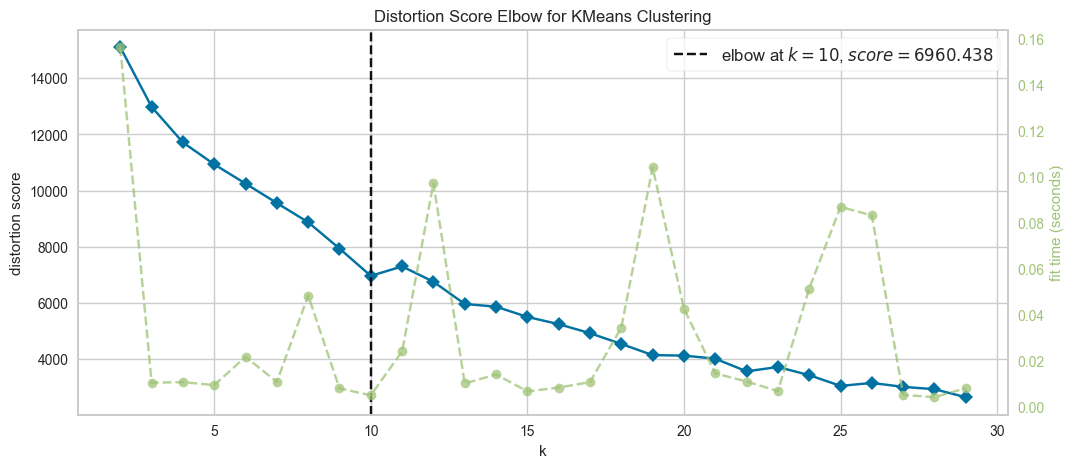

Kümeleme Analizi 01.67 Dakikada Tamamlandı.


In [9]:
import time
start = time.time()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

kmeans = KMeans()

plt.figure(figsize=(12, 5))

visualizer = KElbowVisualizer(kmeans, k=(2, 30), locate_elbow=True)
visualizer.fit(scaled_data)
visualizer.show()

end = time.time()
elapsed_time = end - start
print(f"Kümeleme Analizi {int(elapsed_time//60)}{elapsed_time%60:.2f} Dakikada Tamamlandı.")

En uygun küme sayısı 9 olarak elde edildi. Şimdi bu küme sayısına ilişkin veri noktalarının hangi kümeye dahil olduğunu gösteren bir sütun oluşturalım.

In [10]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(df)

df['Küme'] = kmeans.labels_
df['Level'] = target_col

df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Küme,Level
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,8,Low
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,0,Medium
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,2,High
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,2,High
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,7,High


In [11]:
df.to_csv("../Database/Add_Cluster_Feature.csv", index=False)